# Noise Cancellation Using Steepest Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Fs=48000
f=1000
no_of_samples=1000000
t=np.arange(0,(no_of_samples)/Fs,1/Fs )


In [3]:
a=np.sin(2*np.pi*f*t)
#a=np.random.normal(0,1,np.shape(t))
noise=np.random.normal(0,1,np.shape(t))
a_noisy=a+noise
from sklearn.preprocessing import StandardScaler
a_noisy=StandardScaler().fit_transform(a_noisy.reshape(-1,1)).ravel()
sig_noi =np.c_[a,a_noisy]
signal_name=["clean_signal","noise added signal "]


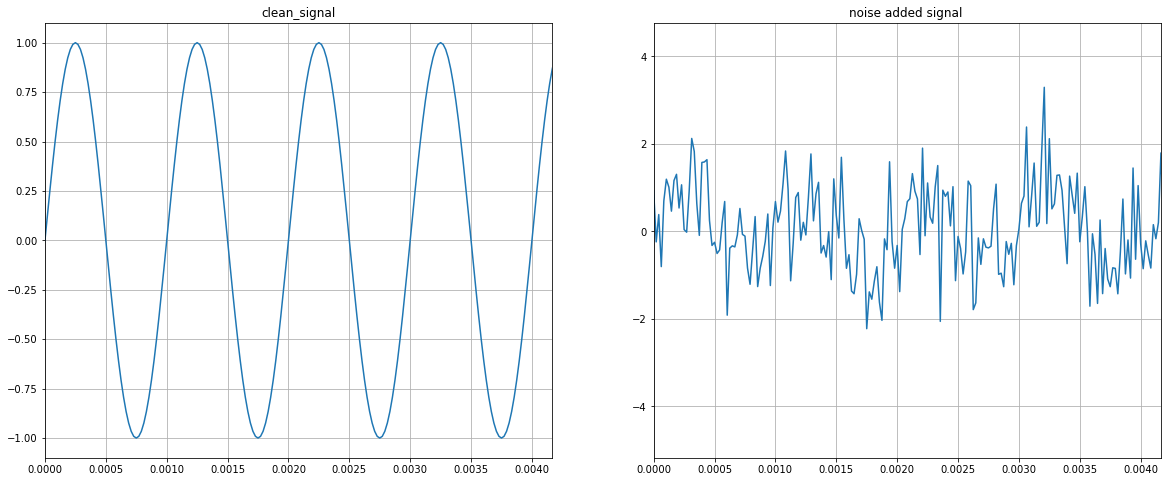

In [4]:
fig,axs=plt.subplots(1,2,figsize=(20,8))
for idx,ax in enumerate (axs.ravel()):
    ax.plot(t,sig_noi[:,idx])
    ax.set_title(f"{signal_name[idx]}")
    ax.set_xlim(0,200/Fs)
    ax.grid(True)

# Implementing SGD

In [5]:
len_vector=3
w=np.zeros((len_vector,))
x=np.zeros((len_vector,))
step_size=0.001
err_vec=[]


In [6]:
from scipy.ndimage.interpolation import shift
for i in range(a_noisy.shape[0]):
    shift(x,1,output=x, cval=noise[i])
    x_pred=np.dot(x,w)
    residual=a_noisy[i]-x_pred
    err_vec.append(residual)
    #step_size*x*residual
    w = w + step_size*x*residual


Text(0, 0.5, 'Residual (Error) ')

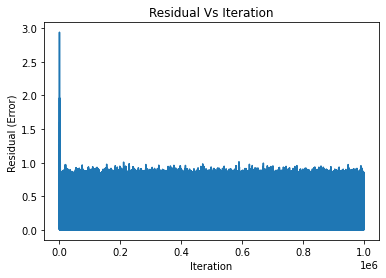

In [8]:
plt.plot(figsize=(20,8))
plt.plot(np.abs(err_vec))
plt.title("Residual Vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Residual (Error) ")